# INTRODUCTION

With this HR dataset about employees who left the company, we will figure out if somehow we can predict if a employee is going to quit, this with the purpuse of improving the company's hiring process and saving expenses too.

# IMPORTING LIBRARIES AND THE DATASET

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [2]:
df = pd.read_csv("HR train.csv")
df.head()

,satisfaction_level,last_evaluation_rating,projects_worked_on,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Department,salary,Attrition
0,3.8,5.3,3,167,3,0,0,sales,low,1
1,8.0,8.6,6,272,6,0,0,sales,medium,1
2,1.1,8.8,8,282,4,0,0,sales,medium,1
3,3.7,5.2,3,169,3,0,0,sales,low,1
4,4.1,5.0,3,163,3,0,0,sales,low,1


In [3]:
df.shape

(25491, 10)

# ETL

### Changing the name of certain columns to match the others format

In [4]:
df = df.rename(columns = {"Department":"deparment",
                         "Work_accident":"work_accident",
                         "Attrition":"attrition"})
df.head()

,satisfaction_level,last_evaluation_rating,projects_worked_on,average_montly_hours,time_spend_company,work_accident,promotion_last_5years,deparment,salary,attrition
0,3.8,5.3,3,167,3,0,0,sales,low,1
1,8.0,8.6,6,272,6,0,0,sales,medium,1
2,1.1,8.8,8,282,4,0,0,sales,medium,1
3,3.7,5.2,3,169,3,0,0,sales,low,1
4,4.1,5.0,3,163,3,0,0,sales,low,1


### Checking for null values

In [5]:
df.isnull().any()

satisfaction_level        False
last_evaluation_rating    False
projects_worked_on        False
average_montly_hours      False
time_spend_company        False
work_accident             False
promotion_last_5years     False
deparment                 False
salary                    False
attrition                 False
dtype: bool

In [6]:
df.dtypes

satisfaction_level        float64
last_evaluation_rating    float64
projects_worked_on          int64
average_montly_hours        int64
time_spend_company          int64
work_accident               int64
promotion_last_5years       int64
deparment                  object
salary                     object
attrition                   int64
dtype: object

### Grouping categorial values due to similitary

In [7]:
print(df["deparment"].unique())
print("*************")
print(df["salary"].unique())

['sales' 'accounting' 'hr' 'technical' 'support' 'management' 'IT'
 'product_mng' 'marketing' 'RandD']
*************
['low' 'medium' 'high']


In [8]:
df["deparment"] = np.where(df["deparment"]=="support", "IT", df["deparment"])
df["deparment"] = np.where(df["deparment"]=="technical", "IT", df["deparment"])

In [9]:
df["deparment"] = np.where(df["deparment"]=="marketing", "sales", df["deparment"])

In [10]:
df["deparment"] = np.where(df["deparment"]=="product_mng", "management", df["deparment"])
df["deparment"] = np.where(df["deparment"]=="RandD", "management", df["deparment"])

In [11]:
df["deparment"] = np.where(df["deparment"]=="accounting", "operations", df["deparment"])
df["deparment"] = np.where(df["deparment"]=="hr", "operations", df["deparment"])

In [12]:
df["deparment"].unique()

array(['sales', 'operations', 'IT', 'management'], dtype=object)

# EDA

### Plotting the Employee Turnover by deparment

0    19501
1     5990
Name: attrition, dtype: int64


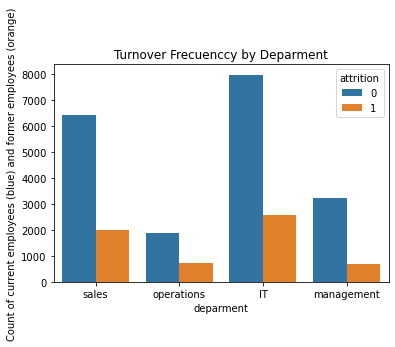

In [13]:
print(df["attrition"].value_counts())
sns.countplot(df["deparment"], hue = df["attrition"])
plt.title("Turnover Frecuenccy by Deparment")
plt.ylabel("Count of current employees (blue) and former employees (orange)")
plt.show()

In [14]:
df.groupby("deparment")["satisfaction_level"].mean()

deparment
IT            6.137237
management    6.200996
operations    5.934381
sales         6.171049
Name: satisfaction_level, dtype: float64

### Converting categorial variables into numerical

In [15]:
df = pd.get_dummies(df)
df.head()

,satisfaction_level,last_evaluation_rating,projects_worked_on,average_montly_hours,time_spend_company,work_accident,promotion_last_5years,attrition,deparment_IT,deparment_management,deparment_operations,deparment_sales,salary_high,salary_low,salary_medium
0,3.8,5.3,3,167,3,0,0,1,0,0,0,1,0,1,0
1,8.0,8.6,6,272,6,0,0,1,0,0,0,1,0,0,1
2,1.1,8.8,8,282,4,0,0,1,0,0,0,1,0,0,1
3,3.7,5.2,3,169,3,0,0,1,0,0,0,1,0,1,0
4,4.1,5.0,3,163,3,0,0,1,0,0,0,1,0,1,0


# MACHINE LEARNING

### Splitting the dataset into dependent and independent variables

In [16]:
y = df["attrition"]
X = df.drop("attrition", axis = 1)

In [17]:
print(y.shape)
print(X.shape)

(25491,)
(25491, 14)


### Getting the most important (significant) columns of our independent variables

In [18]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

rfe = RFE(model, 10)
rfe = rfe.fit(X,y)

print(rfe.support_)
print(rfe.ranking_)

[ True False  True False  True  True  True False  True  True False  True
  True  True]
[1 2 1 5 1 1 1 3 1 1 4 1 1 1]


In [19]:
X.columns

Index(['satisfaction_level', 'last_evaluation_rating', 'projects_worked_on',
       'average_montly_hours', 'time_spend_company', 'work_accident',
       'promotion_last_5years', 'deparment_IT', 'deparment_management',
       'deparment_operations', 'deparment_sales', 'salary_high', 'salary_low',
       'salary_medium'],
      dtype='object')

### Creating a new X but now with the most important columns

In [20]:
important_feat = ['satisfaction_level', 'projects_worked_on', 'time_spend_company', 'work_accident',
       'promotion_last_5years', 'deparment_management',
       'deparment_operations' ]

X = df[important_feat]

### Splitting the dataset into training and testing

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state = 101) 

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report

### Logistic Regression with the classification report and confusion matrix

Logistic Regression accuracy: 77%
*********************************************
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.80      0.86      6739
           1       0.26      0.50      0.34       909

    accuracy                           0.77      7648
   macro avg       0.59      0.65      0.60      7648
weighted avg       0.84      0.77      0.80      7648

*********************************************
Confusion Matrix:


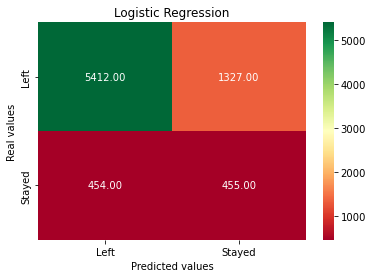

In [22]:
from sklearn.linear_model import LogisticRegression

logmodel = LogisticRegression().fit(X_train, y_train)

preds = logmodel.predict(X_test)

print(f"Logistic Regression accuracy: {round(accuracy_score(y_test, logmodel.predict(X_test))*100)}%")
print("*********************************************")
print("Classification Report:")
print(classification_report(preds, y_test))
print("*********************************************")
print("Confusion Matrix:")
log_cm = confusion_matrix(preds, y_test)
sns.heatmap(log_cm, annot = True, cmap = "RdYlGn", fmt=".2f", xticklabels = ["Left", "Stayed"], yticklabels = ["Left", "Stayed"])
plt.ylabel("Real values")
plt.xlabel("Predicted values")
plt.title("Logistic Regression")
plt.show()

### Random Forest with the classification report and confusion matrix

Random Forest accuracy: 97%
*********************************************
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.98      0.98      5833
           1       0.93      0.92      0.93      1815

    accuracy                           0.97      7648
   macro avg       0.95      0.95      0.95      7648
weighted avg       0.96      0.97      0.96      7648

*********************************************
Confusion Matrix:


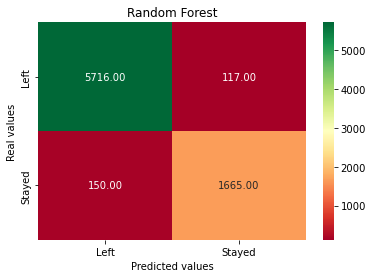

In [23]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier().fit(X_train, y_train)

preds = rf.predict(X_test)

print(f"Random Forest accuracy: {round(accuracy_score(y_test, rf.predict(X_test))*100)}%")
print("*********************************************")
print("Classification Report:")
print(classification_report(preds, y_test))
print("*********************************************")
print("Confusion Matrix:")

rf_cm = confusion_matrix(preds, y_test)
sns.heatmap(rf_cm, annot = True, fmt=".2f", cmap = "RdYlGn", xticklabels = ["Left", "Stayed"], yticklabels = ["Left", "Stayed"])
plt.ylabel("Real values")
plt.xlabel("Predicted values")
plt.title("Random Forest")
plt.show()

### Support Vectior Machine with the classification report and confusion matrix

Support Vector Machine accuracy: 92%
*********************************************
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95      5876
           1       0.83      0.84      0.84      1772

    accuracy                           0.92      7648
   macro avg       0.89      0.89      0.89      7648
weighted avg       0.92      0.92      0.92      7648

*********************************************
Confusion Matrix:


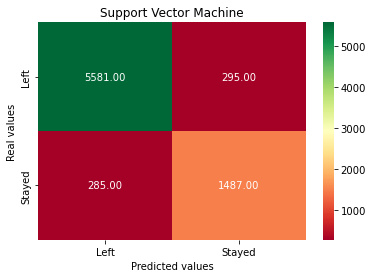

In [24]:
from sklearn.svm import SVC
svc = SVC().fit(X_train, y_train)

print(f"Support Vector Machine accuracy: {round(accuracy_score(y_test, svc.predict(X_test))*100)}%")
print("*********************************************")
print("Classification Report:")
print(classification_report(svc.predict(X_test), y_test))
print("*********************************************")
print("Confusion Matrix:")

svm_cm = confusion_matrix(svc.predict(X_test), y_test)
sns.heatmap(svm_cm, annot = True, fmt=".2f", cmap = "RdYlGn", xticklabels = ["Left", "Stayed"], yticklabels = ["Left", "Stayed"])
plt.ylabel("Real values")
plt.xlabel("Predicted values")
plt.title("Support Vector Machine")
plt.show()

### XGBOOST with the classification report and confusion matrix

XGBoost accuracy: 96%
*********************************************
Confusion Matrix:


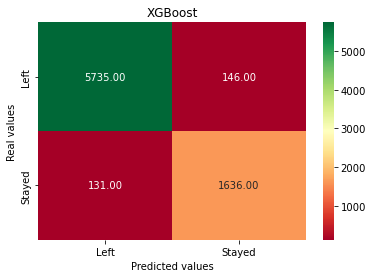

In [25]:
from xgboost import XGBClassifier
xgb=XGBClassifier().fit(X_train, y_train)
preds = xgb.predict(X_test)

print(f"XGBoost accuracy: {round(accuracy_score(y_test, preds)*100)}%")
print("*********************************************")
print("Confusion Matrix:")

xgb_cm = confusion_matrix(preds, y_test)
sns.heatmap(xgb_cm, annot = True, fmt=".2f", cmap = "RdYlGn", xticklabels = ["Left", "Stayed"], yticklabels = ["Left", "Stayed"])
plt.ylabel("Real values")
plt.xlabel("Predicted values")
plt.title("XGBoost")
plt.show()

# CONCLUSIONS

We can notice that the Random Forest and the XGBoost were the highest accuracy rate, so it is recommend to use them in this scenario and with this kind of dataset for improving the business needs.